In [1]:
import pandas as pd
df=pd.read_csv('C:/Users/dell/Downloads/EOD-AAPL.csv')

In [2]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0
1,2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0
2,2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0
3,2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
4,2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0


In [3]:
df.set_index('Date',inplace=True)

In [4]:
df['HL_PCT']=(df['Adj_High']-df['Adj_Low'])/df['Adj_Close']*100

In [5]:
df['PCT_Change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100

In [6]:
df.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_Change
Date,,,,,,,,,,,,,,
2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0,0.800795,0.046784
2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0,0.627198,0.293945
2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0,1.050009,-0.134660
2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0,0.527970,0.188917
2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0,1.097080,0.482287


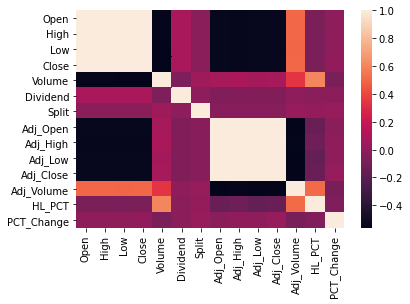

In [7]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr)

In [8]:
df1=df[['Adj_Close','PCT_Change','HL_PCT','Adj_Volume']]

In [9]:
df1.head()

,Adj_Close,PCT_Change,HL_PCT,Adj_Volume
Date,,,,
2017-12-28,41.156217,0.046784,0.800795,65920748.0
2017-12-27,41.040745,0.293945,0.627198,85992852.0
2017-12-26,41.033528,-0.134660,1.050009,132742144.0
2017-12-22,42.101646,0.188917,0.527970,65397776.0
2017-12-21,42.101646,0.482287,1.097080,83799584.0


In [10]:
import numpy as np
df1.replace(np.nan,-99999)

,Adj_Close,PCT_Change,HL_PCT,Adj_Volume
Date,,,,
2017-12-28,41.156217,0.046784,0.800795,65920748.0
2017-12-27,41.040745,0.293945,0.627198,85992852.0
2017-12-26,41.033528,-0.134660,1.050009,132742144.0
2017-12-22,42.101646,0.188917,0.527970,65397776.0
2017-12-21,42.101646,0.482287,1.097080,83799584.0
...,...,...,...,...
2013-09-09,16.033661,0.231683,0.877176,340687200.0
2013-09-06,15.781833,-0.044138,1.892738,359525600.0
2013-09-05,15.688388,-0.995502,1.421447,236367600.0


In [11]:
corr=df1.corr()

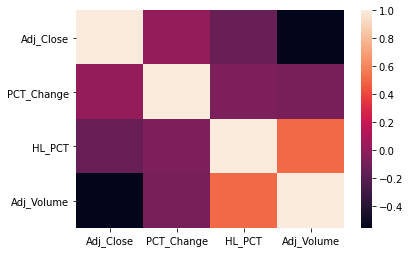

In [12]:
sns.heatmap(corr)

In [13]:
label=df1['Adj_Close'].shift(-2)

In [14]:
label.dropna(inplace=True)

In [15]:
y=label
x=(df1[['Adj_Close','PCT_Change','HL_PCT','Adj_Volume']])
x=x[:-2]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [18]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
score=regressor.score(x_test,y_test)

In [20]:
y_pred= regressor.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.2009607123423732

In [23]:
import sklearn
print("R2 score=", round(sklearn.metrics.r2_score(y_test,y_pred),2))

R2 score= 1.0
